In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [2]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Training dataset has {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

Training dataset has 333 rows and 15 columns.
Test dataset has 173 rows and 14 columns.


In [4]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
train.describe(include='all')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
test.describe(include='all')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


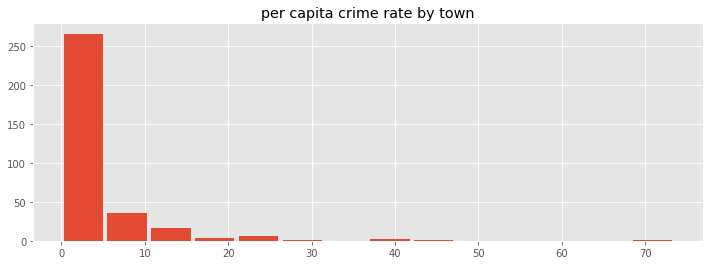

In [9]:
train.crim.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('per capita crime rate by town')
plt.show(block=False)

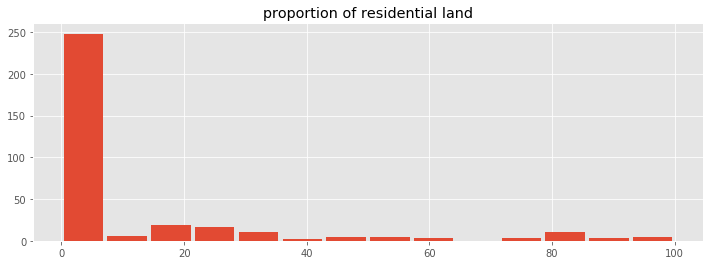

In [10]:
train.zn.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of residential land')
plt.show(block=False)

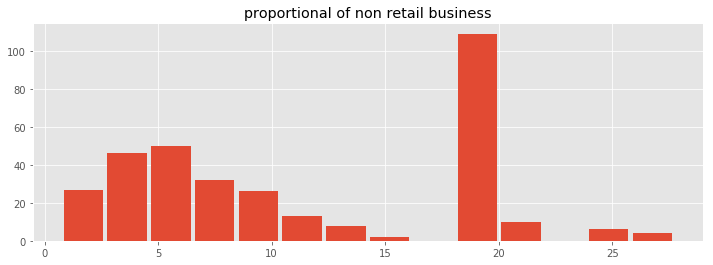

In [11]:
train.indus.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportional of non retail business')
plt.show(block=False)

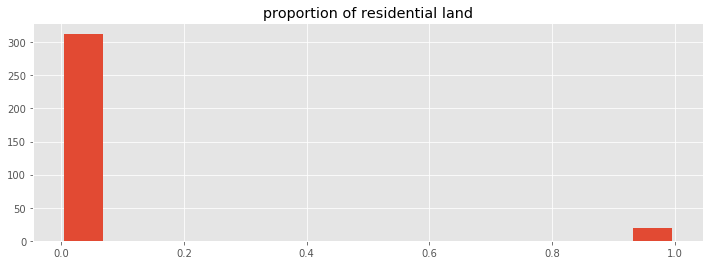

In [12]:
train.chas.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of residential land')
plt.show(block=False)

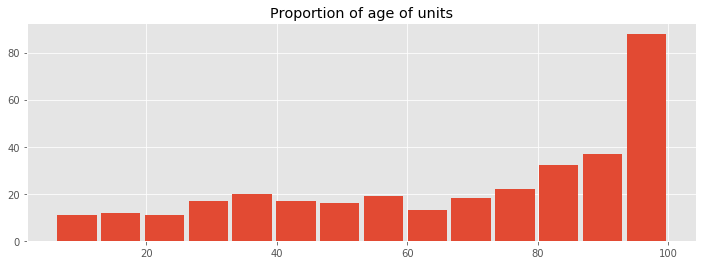

In [13]:
train.age.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Proportion of age of units')
plt.show(block=False)

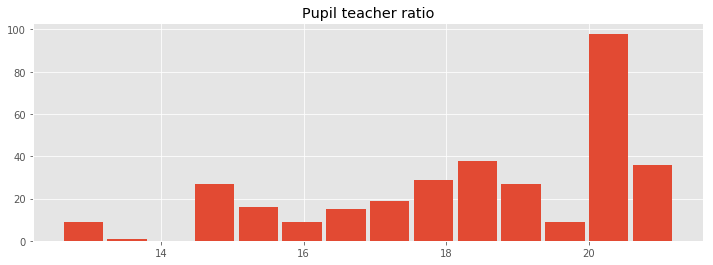

In [14]:
train.ptratio.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Pupil teacher ratio')
plt.show(block=False)

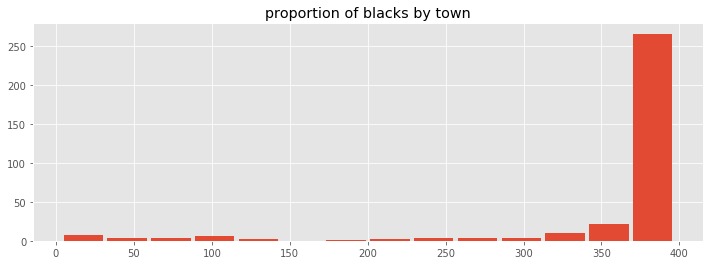

In [15]:
train.black.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of blacks by town')
plt.show(block=False)

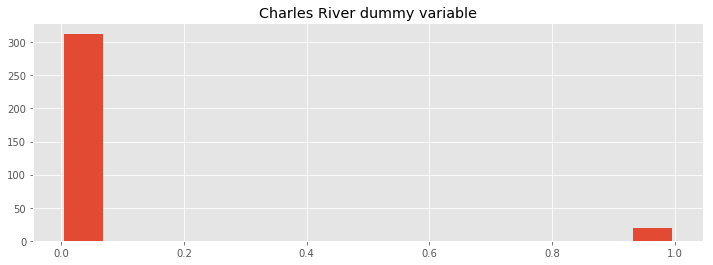

In [16]:
train.chas.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Charles River dummy variable')
plt.show(block=False)

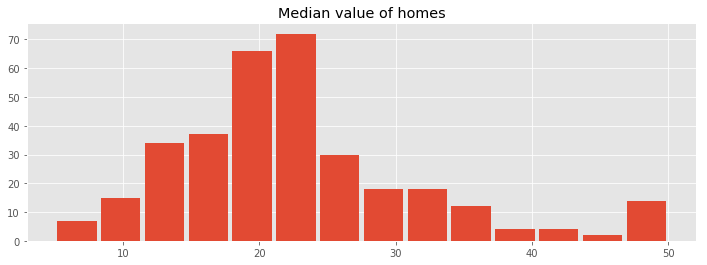

In [17]:
# Lets look at target variable
train.medv.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Median value of homes')
plt.show(block=False)

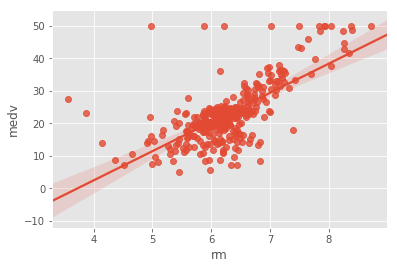

In [18]:
sns.regplot(x=train.rm,y=train.medv)

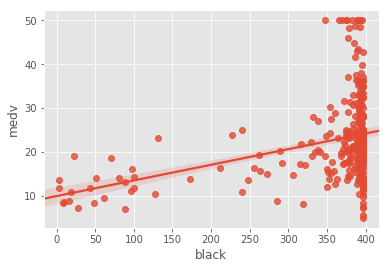

In [19]:
sns.regplot(x=train.black,y=train.medv)

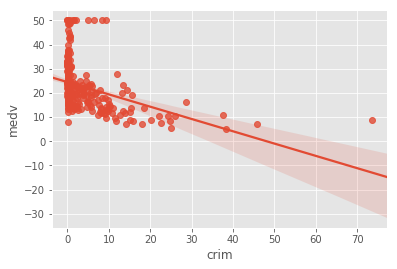

In [20]:
sns.regplot(x=train.crim,y=train.medv)

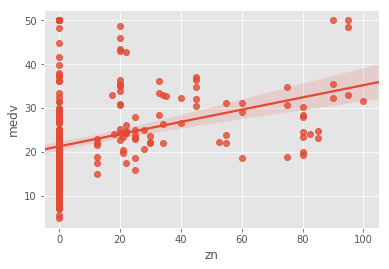

In [21]:
sns.regplot(x=train.zn,y=train.medv)

In [22]:
train = train.drop(train[train.medv == 50].index)
train = train.drop(train[train.crim > 70].index)
#train['black'] = np.where(train['black']>=300,1,0)
#test['black']= np.where(test['black']>=300,1,0)

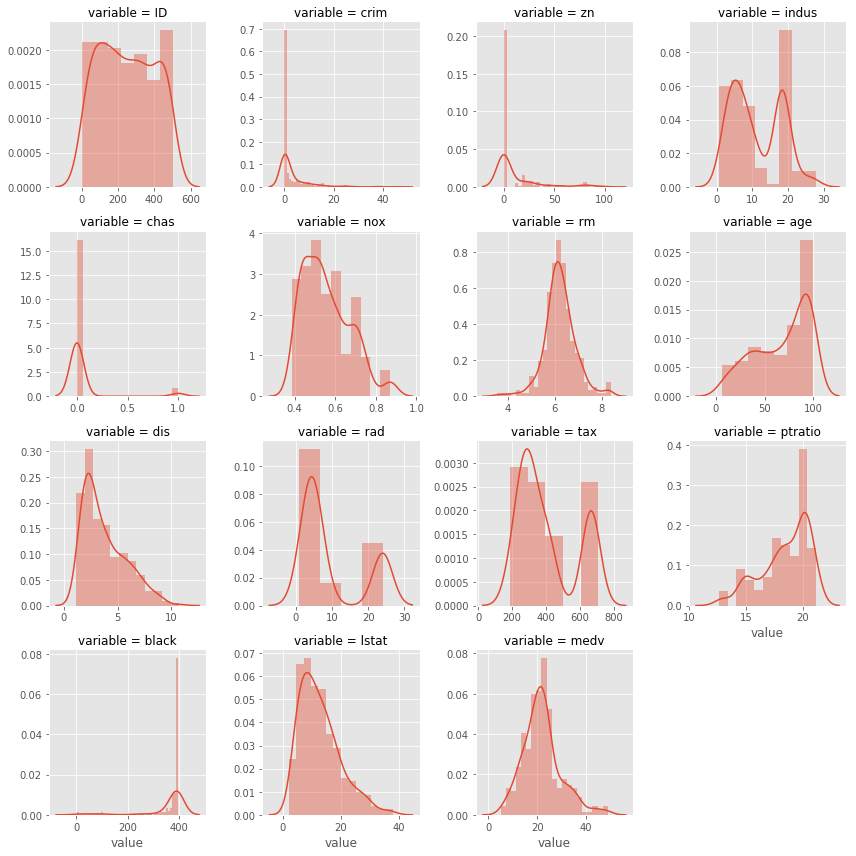

In [23]:
f = pd.melt(train)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

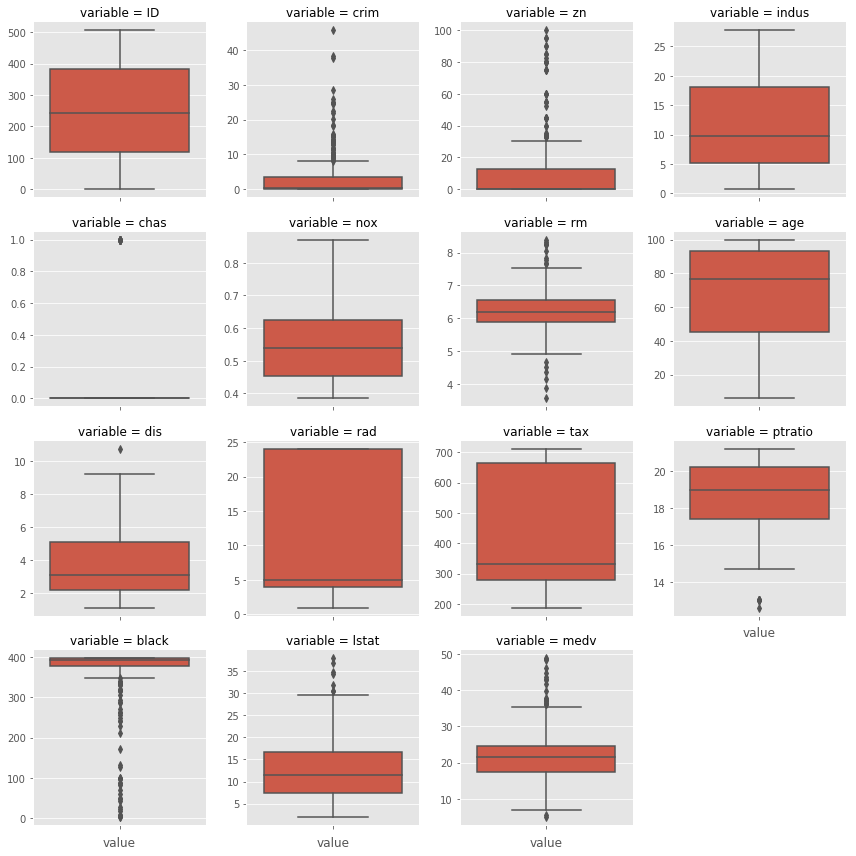

In [24]:
f = pd.melt(train)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.boxplot,'value',orient='v')
g.set_xticklabels(rotation=90)

In [25]:
# Check for missing values
train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [26]:
# Check for duplicate values
print('Train set duplicate IDs: {}'.format(train.duplicated('ID').sum()))
print('Test set duplicate IDs: {}'.format(test.duplicated('ID').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


In [27]:
# Data cleaning
test_id=test['ID']
train = train.drop('ID', 1)
test = test.drop('ID', 1)

In [28]:
train.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.230573,0.463560,-0.052977,0.505877,-0.359085,0.406324,-0.433275,0.731094,0.675437,0.335618,-0.435821,0.600569,-0.515584
zn,-0.230573,1.000000,-0.514082,-0.057246,-0.495236,0.330940,-0.535878,0.643557,-0.298195,-0.298161,-0.367084,0.168026,-0.398620,0.396386
indus,0.463560,-0.514082,1.000000,0.021034,0.745493,-0.473945,0.626821,-0.697560,0.567858,0.703587,0.401118,-0.337833,0.650164,-0.609219
chas,-0.052977,-0.057246,0.021034,1.000000,0.081958,0.058219,0.064267,-0.065627,-0.013829,-0.047551,-0.113576,0.055397,-0.000507,0.098563
nox,0.505877,-0.495236,0.745493,0.081958,1.000000,-0.347532,0.731498,-0.768228,0.608682,0.664544,0.180420,-0.367790,0.617365,-0.502433
rm,-0.359085,0.330940,-0.473945,0.058219,-0.347532,1.000000,-0.271360,0.304440,-0.261555,-0.353619,-0.324233,0.149900,-0.614266,0.703952
age,0.406324,-0.535878,0.626821,0.064267,0.731498,-0.271360,1.000000,-0.757842,0.436949,0.499071,0.257145,-0.266143,0.624611,-0.478514
dis,-0.433275,0.643557,-0.697560,-0.065627,-0.768228,0.304440,-0.757842,1.000000,-0.467389,-0.519210,-0.230850,0.286812,-0.546005,0.372546
rad,0.731094,-0.298195,0.567858,-0.013829,0.608682,-0.261555,0.436949,-0.467389,1.000000,0.901013,0.457278,-0.405424,0.506638,-0.453005
tax,0.675437,-0.298161,0.703587,-0.047551,0.664544,-0.353619,0.499071,-0.519210,0.901013,1.000000,0.458009,-0.405978,0.568352,-0.563675


In [29]:
train['chas0'] = np.where(train['chas']==0,1,0)
train['chas1'] = np.where(train['chas']==1,1,0)
test['chas0'] = np.where(test['chas']==0,1,0)
test['chas1'] = np.where(test['chas']==1,1,0)

In [30]:
for cols in list(train):
    print('Column {} has Skew: {:.3f} | Kurtosis: {:.3f}'.format(cols,
        skew(train[cols]), kurtosis(train[cols])))

Column crim has Skew: 3.253 | Kurtosis: 13.074
Column zn has Skew: 2.361 | Kurtosis: 4.860
Column indus has Skew: 0.332 | Kurtosis: -1.191
Column chas has Skew: 4.137 | Kurtosis: 15.115
Column nox has Skew: 0.734 | Kurtosis: -0.102
Column rm has Skew: 0.048 | Kurtosis: 2.242
Column age has Skew: -0.586 | Kurtosis: -0.947
Column dis has Skew: 0.926 | Kurtosis: 0.068
Column rad has Skew: 1.011 | Kurtosis: -0.846
Column tax has Skew: 0.660 | Kurtosis: -1.152
Column ptratio has Skew: -0.810 | Kurtosis: -0.263
Column black has Skew: -2.980 | Kurtosis: 7.877
Column lstat has Skew: 0.989 | Kurtosis: 0.751
Column medv has Skew: 0.789 | Kurtosis: 1.148
Column chas0 has Skew: -4.137 | Kurtosis: 15.115
Column chas1 has Skew: 4.137 | Kurtosis: 15.115


In [31]:
train["crim"]=np.sqrt(train["crim"])
test["crim"]=np.sqrt(test["crim"])
train["zn"]=np.sqrt(train["zn"])
test["zn"]=np.sqrt(test["zn"])

In [32]:
for cols in list(train):
    print('Column {} has Skew: {:.3f} | Kurtosis: {:.3f}'.format(cols,
        skew(train[cols]), kurtosis(train[cols])))

Column crim has Skew: 1.614 | Kurtosis: 2.098
Column zn has Skew: 1.522 | Kurtosis: 0.920
Column indus has Skew: 0.332 | Kurtosis: -1.191
Column chas has Skew: 4.137 | Kurtosis: 15.115
Column nox has Skew: 0.734 | Kurtosis: -0.102
Column rm has Skew: 0.048 | Kurtosis: 2.242
Column age has Skew: -0.586 | Kurtosis: -0.947
Column dis has Skew: 0.926 | Kurtosis: 0.068
Column rad has Skew: 1.011 | Kurtosis: -0.846
Column tax has Skew: 0.660 | Kurtosis: -1.152
Column ptratio has Skew: -0.810 | Kurtosis: -0.263
Column black has Skew: -2.980 | Kurtosis: 7.877
Column lstat has Skew: 0.989 | Kurtosis: 0.751
Column medv has Skew: 0.789 | Kurtosis: 1.148
Column chas0 has Skew: -4.137 | Kurtosis: 15.115
Column chas1 has Skew: 4.137 | Kurtosis: 15.115


In [33]:
y=train['medv']
x=train
del x['medv']
# Split train to get validaton set
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(x, y, test_size=0.25, random_state=40)

In [34]:
x.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,chas0,chas1
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.00000,321.000000,321.000000,321.000000,321.000000
mean,1.180492,1.573175,11.211651,0.049844,0.556588,6.230875,67.782243,3.755440,9.523364,407.566978,18.48785,359.848224,12.767975,0.950156,0.049844
std,1.327097,2.839489,6.968600,0.217963,0.115716,0.658019,28.105736,1.982631,8.681891,169.772705,2.12147,85.963780,7.007390,0.217963,0.217963
min,0.079498,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.60000,3.500000,1.980000,0.000000,0.000000
25%,0.280998,0.000000,5.130000,0.000000,0.453000,5.880000,45.100000,2.167800,4.000000,279.000000,17.40000,377.070000,7.430000,1.000000,0.000000
50%,0.499800,0.000000,9.690000,0.000000,0.538000,6.185000,76.500000,3.102500,5.000000,330.000000,19.00000,392.300000,11.380000,1.000000,0.000000
75%,1.822375,3.535534,18.100000,0.000000,0.624000,6.552000,93.400000,5.118000,24.000000,666.000000,20.20000,396.330000,16.590000,1.000000,0.000000
max,6.763586,10.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,21.20000,396.900000,37.970000,1.000000,1.000000


In [35]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import scipy.stats as st

In [36]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [37]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
import itertools

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.005,max_iter = 100000, random_state=1))
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, l1_ratio=.9,max_iter = 100000, random_state=3))

# lassoLarsIC= make_pipeline(RobustScaler(), LassoLarsIC(criterion='aic', fit_intercept=True, verbose=False,
#             normalize=True, precompute='auto', max_iter=500,
#             eps=2.2204460492503131e-16, copy_X=True, positive=False))
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


print('Lasso -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(lasso, X_train, Y_train).mean(),rsme(lasso,X_validation , Y_validation).mean()))
print('Elasticnet -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(Enet, X_train, Y_train).mean(),rsme(Enet,X_validation , Y_validation).mean()))

# print('lassoLarsIC -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
#     rsme(lassoLarsIC, X_train, Y_train).mean(),rsme(lassoLarsIC,X_validation , Y_validation).mean()))
# print('KRR -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f} '.format(
#     rsme(KRR, X_train, Y_train).mean(),rsme(KRR,X_validation , Y_validation).mean()))


Lasso -> Train RSME: 3.85698 | Avg. Validation RMSE: 4.35198
Elasticnet -> Train RSME: 3.85580 | Avg. Validation RMSE: 4.34321


In [38]:
params = {  
    "n_estimators": st.randint(50,500),
    "max_depth": st.randint(3, 100),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0.001, 10),
    'reg_alpha': st.expon(0, 50),
    "min_child_weight": st.expon(0, 50)
}
# Split train to get validaton set
x1, x2, y1, y2 = \
    train_test_split(X_train, Y_train, test_size=0.2, random_state=40)

#fit_params={"early_stopping_rounds":40, 
#            "eval_metric" : "rmse", 
#            "eval_set" : [[x2,y2]]}
model_xgb =xgb.XGBRegressor()
model_xgb = RandomizedSearchCV(model_xgb, params,
                               #fit_params=fit_params,
                               n_jobs=1,cv=20, scoring='neg_mean_squared_error')
model_xgb.fit(x1,y1)
model_xgb = model_xgb.best_estimator_
model_xgb.fit(X_train,Y_train)
ypred=model_xgb.predict(X_validation)
print('XGboost -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(model_xgb, X_train, Y_train).mean(),rsme(model_xgb,X_validation , Y_validation).mean()))

XGboost -> Train RSME: 2.97372 | Avg. Validation RMSE: 3.92733


In [39]:
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=50)
params={'n_estimators':st.randint(50,200), 
            'learning_rate': st.uniform(0.05, 0.4),     
            'max_depth': st.randint(3, 100),
            'num_leaves':st.randint(2,10),
            'bagging_fraction':st.uniform()}
# Split train to get validaton set
x1, x2, y1, y2 = \
    train_test_split(X_train, Y_train, test_size=0.2, random_state=40)

#fit_params={"early_stopping_rounds":40, 
#            "eval_metric" : "rmse", 
#            "eval_set" : [[x2,y2]]}
            
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
model_lgb = RandomizedSearchCV(model_lgb, params,
                               #fit_params=fit_params,
                               n_jobs=1,cv=20, scoring='neg_mean_squared_error')
model_lgb.fit(x1,y1)
model_lgb = model_lgb.best_estimator_
ypred=model_lgb.predict(X_validation)
print('XGboost -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(model_lgb, X_train, Y_train).mean(),rsme(model_lgb,X_validation , Y_validation).mean()))

XGboost -> Train RSME: 2.99607 | Avg. Validation RMSE: 4.54469


In [40]:
model_rf= RandomForestRegressor()
params={'n_estimators':[50,100,250,500,1000]} 
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
model_rf =GridSearchCV(model_rf, params, n_jobs=1,cv=10, scoring='neg_mean_squared_error')
model_rf.fit(X_train, Y_train)
model_rf = model_rf.best_estimator_
ypred=model_rf.predict(X_validation)
print('Random forest -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f} '.format(
    rsme(model_rf, X_train, Y_train).mean(), rsme(model_rf,X_validation,Y_validation).mean()))

Random forest -> Train RSME: 2.87390 | Avg. Validation RMSE: 3.49837 


In [41]:
model_rf.fit(x,y)
model_lgb.fit(x,y)
model_xgb.fit(x,y)
ypred1=model_rf.predict(test)
ypred2=model_lgb.predict(test)
ypred3=model_xgb.predict(test)
ensemble=(ypred1+ypred2+ypred3)/3
d = {'ID': test_id,
    'medv':ensemble}
df = pd.DataFrame(d)
df.to_csv('submission.csv', sep=',', index=False)